# Основи програмування та аналізу даних на мові Python

---

# Практичне заняття 3

## Групування даних за допомогою методу **agg** та **groupby**

In [ ]:
import pandas as pd

Cтворимо  DataFrame який містить учнік з двох класів їх стать та відмітки

In [ ]:
df = pd.DataFrame({'class' : ['a', 'a', 'b', 'b', 'a','b'],
                   'gender' : ['m', 'f', 'm', 'f', 'm', 'f'],
                   'marks_F' : [1,3,5,2,4,5],
                   'marks_M' : [5,4,3,2,1,2],
                   })
df

,class,gender,marks_F,marks_M
0,a,m,1,5
1,a,f,3,4
2,b,m,5,3
3,b,f,2,2
4,a,m,4,1
5,b,f,5,2


Виберемо одну колонку, та знайдемо `min`, `max`,`mean` значення

In [ ]:
df['marks_F']

0    1
1    3
2    5
3    2
4    4
5    5
Name: marks_F, dtype: int64

In [ ]:
df['marks_F'].min()

1

Можна згорнути одразу кілька функцій за допомогою методу `aggregate` або `agg`

In [ ]:
df.agg(['min','max'])

,class,gender,marks_F,marks_M
min,a,f,1,1
max,b,m,5,5


In [ ]:
df_min_max = df.agg(['min','max'])
df_min_max

,class,gender,marks_F,marks_M
min,a,f,1,1
max,b,m,5,5


In [ ]:
df_min_max.index

Index(['min', 'max'], dtype='object')

Як підрахувати загальний бал у кожному класі? Для цого скористаемось методом `groupby`

In [ ]:
df

,class,gender,marks_F,marks_M
0,a,m,1,5
1,a,f,3,4
2,b,m,5,3
3,b,f,2,2
4,a,m,4,1
5,b,f,5,2


In [ ]:
df.groupby(df['class'])

Дані згруповані, але потрібно підрахувати суму балів у кожній групі

In [ ]:
df.groupby(df['class']).sum()

,gender,marks_F,marks_M
class,,,
a,mfm,8,10
b,mff,12,7


In [ ]:
df.groupby(['class'])[['marks_F']].mean()

,marks_F
class,
a,2.666667
b,4.000000


In [ ]:
df['marks_M'].groupby(df['class']).max()

class
a    5
b    3
Name: marks_M, dtype: int64

У кожній групі можна розрахувати декілька ознак одночасно

In [ ]:
df['marks_M'].groupby(df['class']).agg(['mean','max','min'])

,mean,max,min
class,,,
a,3.333333,5,1
b,2.333333,3,2


<Axes: xlabel='class'>

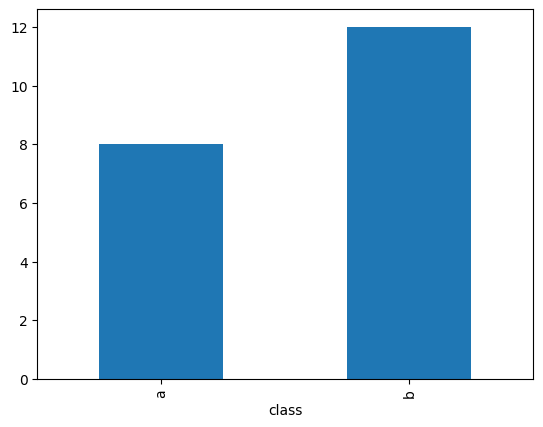

In [ ]:
df['marks_F'].groupby(df['class']).sum().plot.bar()

## Позначка часу `timestamp` та бібліотека `datetime`

In [ ]:
from datetime import datetime, timedelta
# now = datetime.now()
now = datetime.today()
now
# now.month, now.day

datetime.datetime(2024, 6, 10, 7, 52, 43, 970554)

In [ ]:
type(now)

datetime.datetime

In [ ]:
now.month # отримати місяць

6

In [ ]:
print(now.time())
print((now + timedelta(hours=3)).time()) # Посунути час на 2 години

07:52:43.970554
10:52:43.970554


In [ ]:
date_ex = '2022-10-20 11:23:34' # Позначка часу str

In [ ]:
pd.to_datetime(date_ex) # Str to timestamp
# pd.to_datetime(date_ex).date()

Timestamp('2022-10-20 11:23:34')

## Практичне завдання. Аналіз погодних умов в Харкові на 2020 рік

Дані містять погодинні вимірювання метеостанції протягом 2020 року. Стовпці  містять дані різноманітних параметрів.

`date_time` --- позначка часу

`tempC` --- температура повітря, °C

`totalSnow_cm`  --- глибина снигуб, см

`precipMM`  --- кількість опадів, mm

`humidity`  --- вологість повітря, %

`windspeedKmph` --- швидкість вітру, км/г

 ## Завдання 1
Розрахуэме *максимальне*, *мінімальне* та *середнє значення температури* за кожен день вимірів.

Завантажимо файл з серверу Google Drive

In [ ]:
!wget -O "weather_kharkov_2020.csv" "https://drive.google.com/uc?id=1duRuYHMPnU6k0AK7nHcngnIBdv0I9Liy&export=download"

--2024-06-10 07:53:00--  https://drive.google.com/uc?id=1duRuYHMPnU6k0AK7nHcngnIBdv0I9Liy&export=download
Resolving drive.google.com (drive.google.com)... 74.125.126.102, 74.125.126.113, 74.125.126.101, ...
Connecting to drive.google.com (drive.google.com)|74.125.126.102|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1duRuYHMPnU6k0AK7nHcngnIBdv0I9Liy&export=download [following]
--2024-06-10 07:53:00--  https://drive.usercontent.google.com/download?id=1duRuYHMPnU6k0AK7nHcngnIBdv0I9Liy&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 142.250.125.132, 2607:f8b0:4001:c2f::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|142.250.125.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1091355 (1.0M) [application/octet-stream]
Saving to: ‘weather_kharkov_2020.csv’

weather_kharkov_202 100%[===================>]   1.0

In [ ]:
data_raw = pd.read_csv("weather_kharkov_2020.csv")

In [ ]:
# data_raw.head()
# data_raw.tail()
data_raw.columns

Index(['date_time', 'maxtempC', 'mintempC', 'totalSnow_cm', 'sunHour',
       'uvIndex', 'moon_illumination', 'moonrise', 'moonset', 'sunrise',
       'sunset', 'DewPointC', 'FeelsLikeC', 'HeatIndexC', 'WindChillC',
       'WindGustKmph', 'cloudcover', 'humidity', 'precipMM', 'pressure',
       'tempC', 'visibility', 'winddirDegree', 'windspeedKmph', 'city'],
      dtype='object')

In [ ]:
data = data_raw.loc[:,['date_time','tempC','totalSnow_cm','precipMM','humidity','windspeedKmph']]
data.head()

,date_time,tempC,totalSnow_cm,precipMM,humidity,windspeedKmph
0,2020-01-01 00:00:00,1,1.0,0.7,97,19
1,2020-01-01 01:00:00,1,1.0,0.5,97,19
2,2020-01-01 02:00:00,1,1.0,0.3,97,18
3,2020-01-01 03:00:00,1,1.0,0.1,97,18
4,2020-01-01 04:00:00,1,1.0,0.0,97,19


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date_time      8784 non-null   object 
 1   tempC          8784 non-null   int64  
 2   totalSnow_cm   8784 non-null   float64
 3   precipMM       8784 non-null   float64
 4   humidity       8784 non-null   int64  
 5   windspeedKmph  8784 non-null   int64  
dtypes: float64(2), int64(3), object(1)
memory usage: 411.9+ KB


In [ ]:
data['date_time'] = pd.to_datetime(data['date_time'])  # Перетворимо часові дані в позначку часу

In [ ]:
# Відокремимо дату, місяць та час з позначки часу. Запиши дані ці дані в окремі стовпці
data['date'] = data['date_time'].dt.date
data['month'] = pd.to_datetime(data['date_time']).dt.month
data['time'] = pd.to_datetime(data['date_time']).dt.time
data.head()

,date_time,tempC,totalSnow_cm,precipMM,humidity,windspeedKmph,date,month,time
0,2020-01-01 00:00:00,1,1.0,0.7,97,19,2020-01-01,1,00:00:00
1,2020-01-01 01:00:00,1,1.0,0.5,97,19,2020-01-01,1,01:00:00
2,2020-01-01 02:00:00,1,1.0,0.3,97,18,2020-01-01,1,02:00:00
3,2020-01-01 03:00:00,1,1.0,0.1,97,18,2020-01-01,1,03:00:00
4,2020-01-01 04:00:00,1,1.0,0.0,97,19,2020-01-01,1,04:00:00


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date_time      8784 non-null   datetime64[ns]
 1   tempC          8784 non-null   int64         
 2   totalSnow_cm   8784 non-null   float64       
 3   precipMM       8784 non-null   float64       
 4   humidity       8784 non-null   int64         
 5   windspeedKmph  8784 non-null   int64         
 6   date           8784 non-null   object        
 7   month          8784 non-null   int32         
 8   time           8784 non-null   object        
dtypes: datetime64[ns](1), float64(2), int32(1), int64(3), object(2)
memory usage: 583.4+ KB


Накреслимо дані з температури повітря за цілий рік

<Axes: xlabel='date_time'>

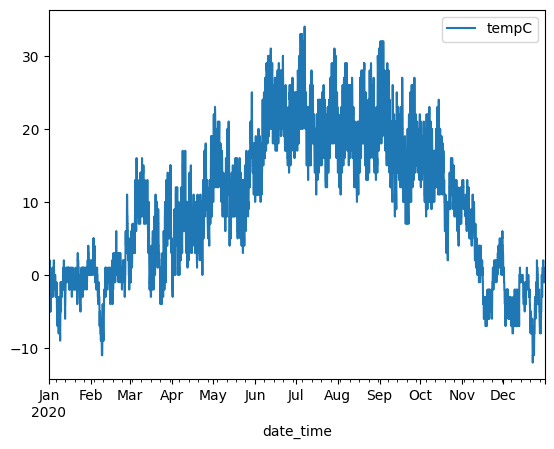

In [ ]:
data.plot(x='date_time', y='tempC')

Зробимо групування даних за ознакою дата, і знайдемо мінімальну температуру для кожного дня.

In [ ]:
data.groupby ('date')['tempC'].min()

date
2020-01-01   -3
2020-01-02   -5
2020-01-03   -3
2020-01-04   -2
2020-01-05   -3
             ..
2020-12-27   -5
2020-12-28   -8
2020-12-29   -6
2020-12-30   -1
2020-12-31   -1
Name: tempC, Length: 366, dtype: int64

Знайдемо максимальне, мінімальне та середнє значення температури за кожен день вимірів.

In [ ]:
Tdays = data.groupby ('date')['tempC'].agg(['min','max','mean'])

<Axes: xlabel='date'>

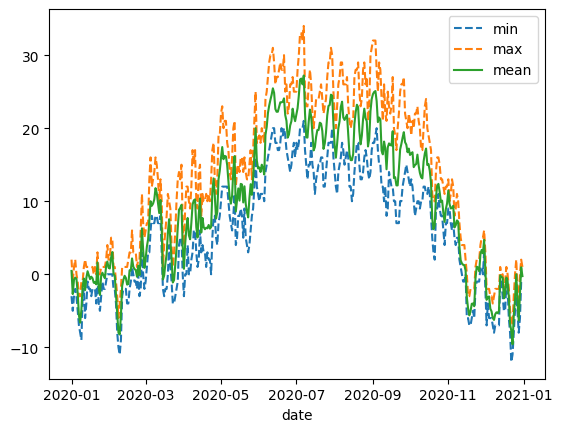

In [ ]:
Tdays.plot(style=['--','--','-'])

Відобразимо дані за певний проміжок часу

In [ ]:
import datetime as dt
dt.date(2020,1,1)

datetime.date(2020, 1, 1)

In [ ]:
Tdays.head()

,min,max,mean
date,,,
2020-01-01,-3,2,0.458333
2020-01-02,-5,-1,-2.708333
2020-01-03,-3,1,-0.750000
2020-01-04,-2,2,-0.458333
2020-01-05,-3,0,-0.625000


In [ ]:
Tdays.index[0]

datetime.date(2020, 1, 1)

Відокремемо дані за січень

In [ ]:
Tdays[Tdays.index<=dt.date(2020,1,31)]

,min,max,mean
date,,,
2020-01-01,-3,2,0.458333
2020-01-02,-5,-1,-2.708333
2020-01-03,-3,1,-0.750000
2020-01-04,-2,2,-0.458333
2020-01-05,-3,0,-0.625000
2020-01-06,-5,-1,-2.583333
2020-01-07,-7,-3,-5.625000
2020-01-08,-8,-3,-6.625000
2020-01-09,-9,-1,-4.833333


In [ ]:
T_Jan = Tdays[(Tdays.index>=dt.date(2020,1,1)) & (Tdays.index<=dt.date(2020,1,31))]

<Axes: xlabel='date'>

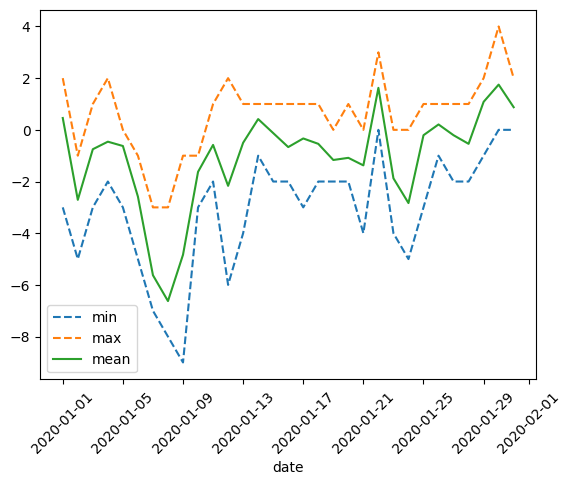

In [ ]:
T_Jan.plot(style=['--','--','-'], rot=45)

**Який місяць був найспекотнішим у 2020 році?**

In [ ]:
data

,date_time,tempC,totalSnow_cm,precipMM,humidity,windspeedKmph,date,month,time
0,2020-01-01 00:00:00,1,1.0,0.7,97,19,2020-01-01,1,00:00:00
1,2020-01-01 01:00:00,1,1.0,0.5,97,19,2020-01-01,1,01:00:00
2,2020-01-01 02:00:00,1,1.0,0.3,97,18,2020-01-01,1,02:00:00
3,2020-01-01 03:00:00,1,1.0,0.1,97,18,2020-01-01,1,03:00:00
4,2020-01-01 04:00:00,1,1.0,0.0,97,19,2020-01-01,1,04:00:00
...,...,...,...,...,...,...,...,...,...
8779,2020-12-31 19:00:00,0,0.0,0.0,95,19,2020-12-31,12,19:00:00
8780,2020-12-31 20:00:00,0,0.0,0.0,95,18,2020-12-31,12,20:00:00
8781,2020-12-31 21:00:00,0,0.0,0.0,95,18,2020-12-31,12,21:00:00
8782,2020-12-31 22:00:00,0,0.0,0.0,95,18,2020-12-31,12,22:00:00


[Text(0, 0, '4'),
 Text(0, 0, '11'),
 Text(0, 0, '16'),
 Text(0, 0, '19'),
 Text(0, 0, '25'),
 Text(0, 0, '31'),
 Text(0, 0, '34'),
 Text(0, 0, '31'),
 Text(0, 0, '32'),
 Text(0, 0, '24'),
 Text(0, 0, '13'),
 Text(0, 0, '3')]

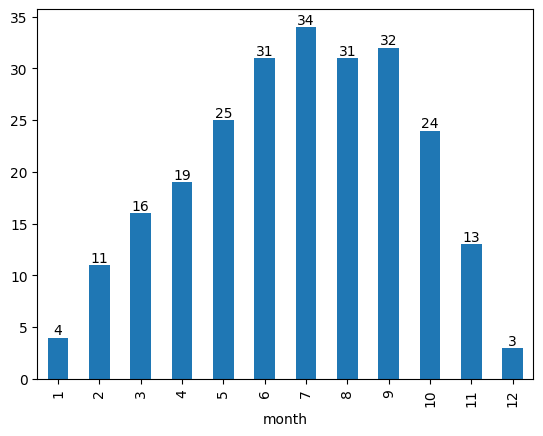

In [ ]:
ax = data.groupby ('month')['tempC'].max().plot.bar()
ax.bar_label(ax.containers[0])

## Завдання 2

Розрахуйте:

1. Середньорічна температура [С]
2. Сумарна кількість опадів [мм]
3. Середньорічна швидкість вітру [м/с]
4. Середньорічна вологість повітря [%]
Порівняйте свої розрахунки з данними в [WiKi](https://https://uk.wikipedia.org/wiki/%D0%9A%D0%BB%D1%96%D0%BC%D0%B0%D1%82_%D0%A5%D0%B0%D1%80%D0%BA%D0%BE%D0%B2%D0%B0)

5. Знайдіть день та час в якому температура повітря сягала мінімума та максімума в 2020 році
6. Знайдіть сумарну кількість опадів за кожен місяц. Дані накресліть за допомогою діаграми `.plot.bar()`
7. Знайдіть, о котрій годині найчастіше був дощ у 2020 році. Для цього здійсніть групування даних за ознакою часу `['time']`, розрахуйте сумарну кількість опадів для кожної години доби протягом 2020 року. Дані накресліть за допомогою діаграми `.plot.bar()`
8. Який місяц був найсухшим в 2020? Розрахуйте мінімальну, максимальну та середню вологість повітря в кожному місяці. Дані накресліть за допомогою діаграми `.plot.bar()`

**1. Середньорічна температура [С]**

In [ ]:
# Беремо середні температури за кожен день і шукаємо середнє значення
Tdays['mean'].mean()

9.771857923497267

**2. Сумарна кількість опадів [мм]**

In [ ]:
data['precipMM'].sum()

475.1

**3. Середньорічна швидкість вітру [м/с]**

In [ ]:
data_days = data.groupby('date')[['tempC', 'humidity', 'windspeedKmph']].agg(['min','max','mean'])
data_days

tempC               humidity                 windspeedKmph      \
             min max      mean      min  max       mean           min max   
date                                                                        
2020-01-01    -3   2  0.458333       81   98  91.708333            16  22   
2020-01-02    -5  -1 -2.708333       86   92  87.958333            12  23   
2020-01-03    -3   1 -0.750000       89   96  93.833333             9  15   
2020-01-04    -2   2 -0.458333       80   93  85.750000            13  23   
2020-01-05    -3   0 -0.625000       87   99  93.083333             6  11   
...          ...  ..       ...      ...  ...        ...           ...  ..   
2020-12-27    -5  -2 -3.500000       91   98  94.125000             5  11   
2020-12-28    -8  -5 -6.333333       87   95  90.958333             6  23   
2020-12-29    -6   0 -2.791667       89   93  91.833333            21  28   
2020-12-30    -1   2  0.958333       93  100  96.333333            15  24   
2020-12-31    -1   1 -0.250000       90   96  93.416667            17  22   

                       
                 mean  
date                   
2020-01-01  20.083333  
2020-01-02  17.375000  
2020-01-03  10.958333  
2020-01-04  17.250000  
2020-01-05   9.000000  
...               ...  
2020-12-27   8.625000  
2020-12-28  17.458333  
2020-12-29  23.375000  
2020-12-30  18.916667  
2020-12-31  18.708333  

[366 rows x 9 columns]

In [ ]:
data_days['windspeedKmph']['mean'].mean()

14.64924863387978

**4. Середньорічна вологість повітря [%] Порівняйте свої розрахунки з данними в WiKi**

In [ ]:
data_days['humidity']['mean'].mean()

72.71903460837886

Згідно сайту середньорічна вологість у Харкові становить 73.8% https://en.wikipedia.org/wiki/Kharkiv

**5. Знайдіть день та час в якому температура повітря сягала мінімума та максімума в 2020 році**

In [ ]:
data.nlargest(1, 'tempC')

,date_time,tempC,totalSnow_cm,precipMM,humidity,windspeedKmph,date,month,time
4527,2020-07-07 15:00:00,34,0.0,0.0,44,15,2020-07-07,7,15:00:00


In [ ]:
data.nsmallest(1, 'tempC')

,date_time,tempC,totalSnow_cm,precipMM,humidity,windspeedKmph,date,month,time
8567,2020-12-22 23:00:00,-12,0.0,0.0,94,10,2020-12-22,12,23:00:00


Максимальна температура була зафікстована 2020-07-07 15:00:00 і становила 34 градуси, найменша - 2020-12-22 23:00:00, становила -12 градусів

**6. Знайдіть сумарну кількість опадів за кожен місяц. Дані накресліть за допомогою діаграми .plot.bar()**

[Text(0, 0, '34.9'),
 Text(0, 0, '66.5'),
 Text(0, 0, '20.8'),
 Text(0, 0, '26.8'),
 Text(0, 0, '81.8'),
 Text(0, 0, '59.9'),
 Text(0, 0, '73.9'),
 Text(0, 0, '15.7'),
 Text(0, 0, '3.5'),
 Text(0, 0, '28.2'),
 Text(0, 0, '32.6'),
 Text(0, 0, '30.5')]

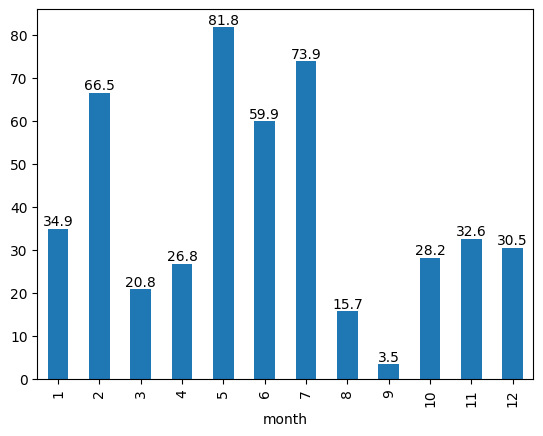

In [ ]:
ax = data.groupby('month')['precipMM'].sum().plot.bar()
ax.bar_label(ax.containers[0])

**7. Знайдіть, о котрій годині найчастіше був дощ у 2020 році. Для цього здійсніть групування даних за ознакою часу ['time'], розрахуйте сумарну кількість опадів для кожної години доби протягом 2020 року. Дані накресліть за допомогою діаграми .plot.bar()**

[Text(0, 0, '15.4'),
 Text(0, 0, '15.2'),
 Text(0, 0, '23.9'),
 Text(0, 0, '27.6'),
 Text(0, 0, '18.1'),
 Text(0, 0, '16.8'),
 Text(0, 0, '15.8'),
 Text(0, 0, '16.3'),
 Text(0, 0, '21'),
 Text(0, 0, '23.5'),
 Text(0, 0, '19.4'),
 Text(0, 0, '15.4'),
 Text(0, 0, '17.1'),
 Text(0, 0, '15'),
 Text(0, 0, '19.1'),
 Text(0, 0, '23.6'),
 Text(0, 0, '32.5'),
 Text(0, 0, '26.6'),
 Text(0, 0, '21.9'),
 Text(0, 0, '15.5'),
 Text(0, 0, '21.9'),
 Text(0, 0, '22.3'),
 Text(0, 0, '16.1'),
 Text(0, 0, '15.1')]

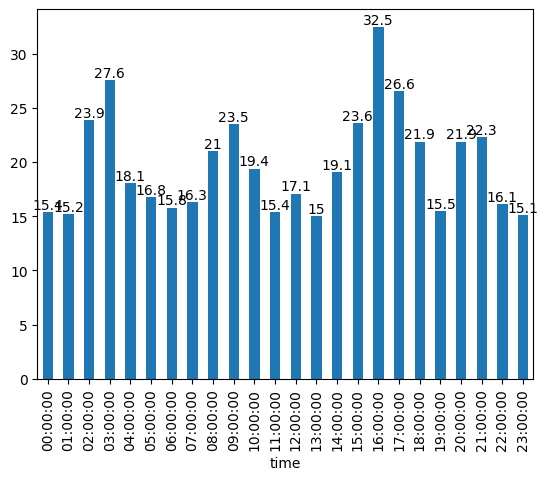

In [ ]:
ax = data.groupby('time')['precipMM'].sum().plot.bar()
ax.bar_label(ax.containers[0])

Найбільша кількість опадів спостерігалась о 16:00 і становила 32.5 сумарно

**8. Який місяц був найсухшим в 2020? Розрахуйте мінімальну, максимальну та середню вологість повітря в кожному місяці. Дані накресліть за допомогою діаграми .plot.bar()**

<Axes: xlabel='month'>

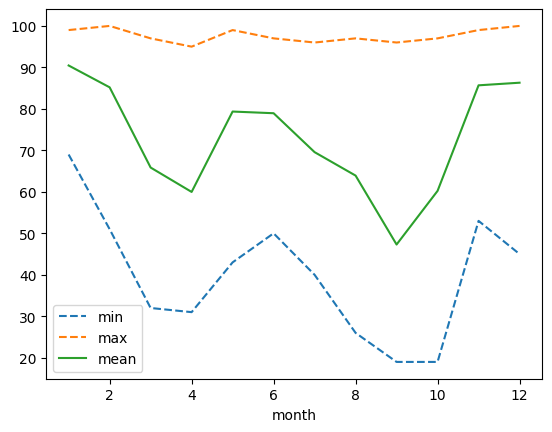

In [ ]:
Hdays = data.groupby ('month')['humidity'].agg(['min','max','mean'])
Hdays.plot(style=['--','--','-'])